# Medicare & Opioid Analysis


---

We are going to do the following:

1.	Import several CSV files provided by github. These include comprehensive data for the states of NC, SC and TN.
  -	Physicians
  -	Prescriptions (files 1-10)
  -	Zip Codes

2.	Create a provider summary and an organizational summary table

3.	Merge the data, query the data, create some bar graphs and visualizations



In [1]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

## Import Data


---

You are provided several files you'll need to import the files and append (concat) them into a single table after you import.

```python
example = pd.concat(["phys1","phys2","phys3"],axis=0)
example.head()
```

**Providers:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv

**Prescriptions:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_3.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_4.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_5.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_6.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_7.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_8.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_9.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_10.csv


**Zips:**

"https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv"


In [2]:
phys_files = ['https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv',
                    'https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv' ,
                    'https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv']

phys = pd.DataFrame()
for file in phys_files:
    phys = pd.concat([phys,pd.read_csv(file)])

phys.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,0.27,0.28,0.46,0.62,0.22,0.09,0.38,0.06,NaN,1.3417
1,1003000936,Stellingworth,Mark,A,MD,M,I,701 Medical Park Dr Ste 301,NaN,Hartsville,...,0.25,0.45,0.75,0.75,0.64,0.07,0.53,0.04,0.13,1.8890
2,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,0.18,0.18,0.52,0.55,0.25,NaN,0.36,0.00,NaN,0.8218
3,1003002841,Choudhary,Saher,K,M.D.,F,I,109 Physicians Dr Ste C,NaN,Greer,...,0.41,0.42,0.75,0.75,0.49,0.12,0.42,NaN,0.74,1.8582
4,1003006172,Quezada,Nestor,NaN,MD,M,I,4539 Hedgemore Dr,Ste 100,Charlotte,...,0.43,0.57,0.71,0.75,0.47,0.11,0.52,0.06,0.14,3.2293


In [3]:
scripts = pd.DataFrame()
for i in range(1,11):
  file = f'https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_{i}.csv'
  scripts = pd.concat([scripts,pd.read_csv(file)])

scripts.head()

,...1,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate
0,0.0,1003000720,Albuterol Sulfate Hfa,Albuterol Sulfate,14,14.0,337,657.01,14.0,No
1,1.0,1003000720,Amoxicillin-Clavulanate Potass,Amoxicillin/Potassium Clav,34,34.0,328,412.06,34.0,No
2,2.0,1003000720,Azithromycin,Azithromycin,12,12.0,52,87.21,12.0,No
3,3.0,1003000720,Cephalexin,Cephalexin,25,25.0,211,144.27,25.0,No
4,4.0,1003000720,Clindamycin Hcl,Clindamycin Hcl,11,11.0,87,111.93,11.0,No


In [4]:
zips = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv",sep=";")

zips.head()

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,90005,Los Angeles,CA,California,True,NaN,39732.0,14151.8,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.05912, -118.30654"
1,90006,Los Angeles,CA,California,True,NaN,59576.0,11981.7,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.04801, -118.29418"
2,90008,Los Angeles,CA,California,True,NaN,31754.0,3337.9,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.00956, -118.34706"
3,90040,Los Angeles,CA,California,True,NaN,12328.0,852.8,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.99353, -118.14907"
4,90045,Los Angeles,CA,California,True,NaN,40567.0,1459.6,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.95297, -118.40014"


In [5]:
phys.columns = ( phys.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)

In [6]:
scripts.columns = ( scripts.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)

In [8]:
zips.columns = ( zips.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)

In [9]:
phys.shape

(84037, 73)

In [10]:
scripts.shape

(1975658, 10)

In [11]:
zips.shape

(33121, 17)

In [12]:
provider_summary = phys.query('rndrng_prvdr_ent_cd == "I"')
provider_summary['provider_name'] =  provider_summary["rndrng_npi"].astype(str) + ": " + provider_summary["rndrng_prvdr_first_name"] + " " + provider_summary["rndrng_prvdr_last_org_name"]

print(provider_summary.columns)
provider_summary = pd.merge(provider_summary, zips, left_on="rndrng_prvdr_zip5", right_on="zip_code", how="inner")
print(provider_summary.shape)
provider_summary.head()

Index(['rndrng_npi', 'rndrng_prvdr_last_org_name', 'rndrng_prvdr_first_name',
       'rndrng_prvdr_mi', 'rndrng_prvdr_crdntls', 'rndrng_prvdr_gndr',
       'rndrng_prvdr_ent_cd', 'rndrng_prvdr_st1', 'rndrng_prvdr_st2',
       'rndrng_prvdr_city', 'rndrng_prvdr_state_abrvtn',
       'rndrng_prvdr_state_fips', 'rndrng_prvdr_zip5', 'rndrng_prvdr_ruca',
       'rndrng_prvdr_ruca_desc', 'rndrng_prvdr_cntry', 'rndrng_prvdr_type',
       'rndrng_prvdr_mdcr_prtcptg_ind', 'tot_hcpcs_cds', 'tot_benes',
       'tot_srvcs', 'tot_sbmtd_chrg', 'tot_mdcr_alowd_amt',
       'tot_mdcr_pymt_amt', 'tot_mdcr_stdzd_amt', 'drug_sprsn_ind',
       'drug_tot_hcpcs_cds', 'drug_tot_benes', 'drug_tot_srvcs',
       'drug_sbmtd_chrg', 'drug_mdcr_alowd_amt', 'drug_mdcr_pymt_amt',
       'drug_mdcr_stdzd_amt', 'med_sprsn_ind', 'med_tot_hcpcs_cds',
       'med_tot_benes', 'med_tot_srvcs', 'med_sbmtd_chrg',
       'med_mdcr_alowd_amt', 'med_mdcr_pymt_amt', 'med_mdcr_stdzd_amt',
       'bene_avg_age', 'bene_age_lt_65_

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,260.8,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
1,1013204148,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,260.8,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
2,1013949759,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,260.8,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
3,1013998848,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,260.8,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"
4,1063481497,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,260.8,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582"


In [13]:
org_summary = phys.query('rndrng_prvdr_ent_cd == "O"')
org_summary['provider_name'] =  org_summary["rndrng_npi"].astype(str) + ": " + org_summary["rndrng_prvdr_last_org_name"] + " - "  + org_summary["rndrng_prvdr_zip5"].astype(str)

org_summary = pd.merge(org_summary, zips, left_on="rndrng_prvdr_zip5", right_on="zip_code", how="inner")

print(org_summary.columns)
org_summary.head()

Index(['rndrng_npi', 'rndrng_prvdr_last_org_name', 'rndrng_prvdr_first_name',
       'rndrng_prvdr_mi', 'rndrng_prvdr_crdntls', 'rndrng_prvdr_gndr',
       'rndrng_prvdr_ent_cd', 'rndrng_prvdr_st1', 'rndrng_prvdr_st2',
       'rndrng_prvdr_city', 'rndrng_prvdr_state_abrvtn',
       'rndrng_prvdr_state_fips', 'rndrng_prvdr_zip5', 'rndrng_prvdr_ruca',
       'rndrng_prvdr_ruca_desc', 'rndrng_prvdr_cntry', 'rndrng_prvdr_type',
       'rndrng_prvdr_mdcr_prtcptg_ind', 'tot_hcpcs_cds', 'tot_benes',
       'tot_srvcs', 'tot_sbmtd_chrg', 'tot_mdcr_alowd_amt',
       'tot_mdcr_pymt_amt', 'tot_mdcr_stdzd_amt', 'drug_sprsn_ind',
       'drug_tot_hcpcs_cds', 'drug_tot_benes', 'drug_tot_srvcs',
       'drug_sbmtd_chrg', 'drug_mdcr_alowd_amt', 'drug_mdcr_pymt_amt',
       'drug_mdcr_stdzd_amt', 'med_sprsn_ind', 'med_tot_hcpcs_cds',
       'med_tot_benes', 'med_tot_srvcs', 'med_sbmtd_chrg',
       'med_mdcr_alowd_amt', 'med_mdcr_pymt_amt', 'med_mdcr_stdzd_amt',
       'bene_avg_age', 'bene_age_lt_65_

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,230.6,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
1,1033624853,East Tennessee Healthcare Holdings Inc,NaN,NaN,NaN,NaN,O,203 Gray Commons Cir Ste 110,NaN,Gray,...,230.6,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
2,1073940334,"Boones Creek Pharmacy, Inc.",NaN,NaN,NaN,NaN,O,4729 N Roan St,Ste 2,Johnson City,...,230.6,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
3,1194812446,Tritenn Llc,NaN,NaN,NaN,NaN,O,208 Suncrest St,Ste 1,Gray,...,230.6,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"
4,1366469843,K Va T Food Stores Inc,NaN,NaN,NaN,NaN,O,125 Judge Gresham Rd,NaN,Gray,...,230.6,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219"


In [14]:
zips.columns

Index(['zip_code', 'official_usps_city_name', 'official_usps_state_code',
       'official_state_name', 'zcta', 'zcta_parent', 'population', 'density',
       'primary_official_county_code', 'primary_official_county_name',
       'county_weights', 'official_county_name', 'official_county_code',
       'imprecise', 'military', 'timezone', 'geo_point'],
      dtype='object')

# Let's look at the top 10 medicare providers by total Medicare payment amount







In [15]:
RES01 = provider_summary.nlargest(10, 'tot_mdcr_pymt_amt')[['provider_name','tot_mdcr_pymt_amt']]
RES01.head()

print(RES01)

                       provider_name  tot_mdcr_pymt_amt
28341      1851320691: Bradley Somer        14030052.64
43420       1366683823: Wanda Lowery        11462667.60
53920         1750541553: Shil Patel        10526851.61
63548         1023018728: Ross Kerns         8945222.23
18596  1801103643: Syed Sameer Nasir         8347614.58
18502      1679529473: David Portnoy         8169092.45
36614    1639179708: Mitchell Martin         8148045.67
6474        1932209855: Robert Lavey         8060160.20
45583        1982670147: John Doster         7796761.71
63594       1619947876: Daniel Ibach         7643785.10


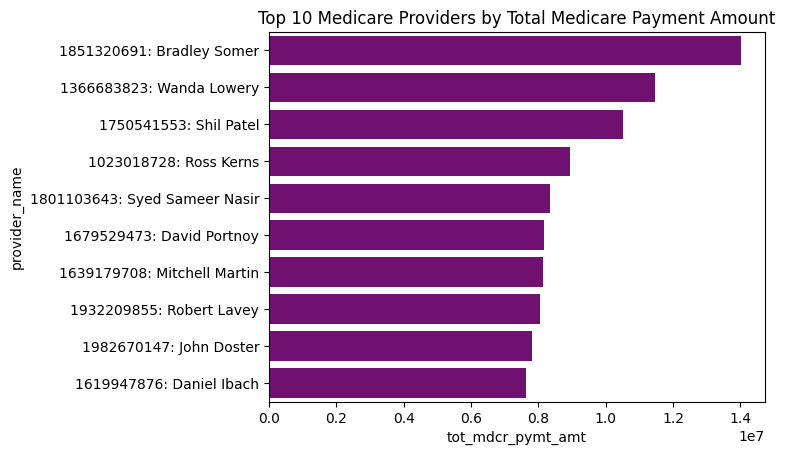

In [16]:
sns.barplot(data=RES01,x='tot_mdcr_pymt_amt',y='provider_name', color='purple')
plt.title('Top 10 Medicare Providers by Total Medicare Payment Amount')
plt.show()

# Now let's look at the top 10 medicare organizations by total Medicare payment amount




In [17]:
RES02 = org_summary.nlargest(10, 'tot_mdcr_pymt_amt')[['provider_name','tot_mdcr_pymt_amt']]
RES02.head()

print(RES02)

                                          provider_name  tot_mdcr_pymt_amt
1774  1538144910: Laboratory Corporation Of America ...       2.346708e+08
2495          1174009245: Vikor Scientific, Llc - 29403       4.219851e+07
2641     1699782722: Aegis Sciences Corporation - 37228       3.306643e+07
1818  1134538713: Mako Medical Laboratories, Llc - 2...       3.128753e+07
189             1235186800: Pathgroup Labs, Llc - 37217       2.179726e+07
1373   1548370745: Memphis Pathology Laboratory - 38134       2.015901e+07
1066  1750368700: Laboratory Corporation Of America ...       1.964342e+07
2639     1124417357: Aegis Sciences Corporation - 37228       1.693110e+07
380   1487212551: Quest Diagnostics Clinical Laborat...       1.586682e+07
94        1508215922: Foundation Medicine, Inc. - 27560       1.564063e+07


In [18]:
# Could also do:

phys["top_10_medicare_providers"] = phys['tot_mdcr_pymt_amt'].rank(ascending=False)
phys[["top_10_medicare_providers", "rndrng_prvdr_last_org_name", "tot_mdcr_pymt_amt"]].sort_values("top_10_medicare_providers").head(10)

,top_10_medicare_providers,rndrng_prvdr_last_org_name,tot_mdcr_pymt_amt
16755,1.0,Laboratory Corporation Of America Holdings,2.346708e+08
14138,2.0,"Vikor Scientific, Llc",4.219851e+07
2590,3.0,Aegis Sciences Corporation,3.306643e+07
11367,4.0,"Mako Medical Laboratories, Llc",3.128753e+07
19459,5.0,"Pathgroup Labs, Llc",2.179726e+07
17858,6.0,Memphis Pathology Laboratory,2.015901e+07
7153,7.0,Laboratory Corporation Of America Holdings,1.964342e+07
10550,8.0,Aegis Sciences Corporation,1.693110e+07
12601,9.0,Quest Diagnostics Clinical Laboratories Inc,1.586682e+07
14290,10.0,"Foundation Medicine, Inc.",1.564063e+07


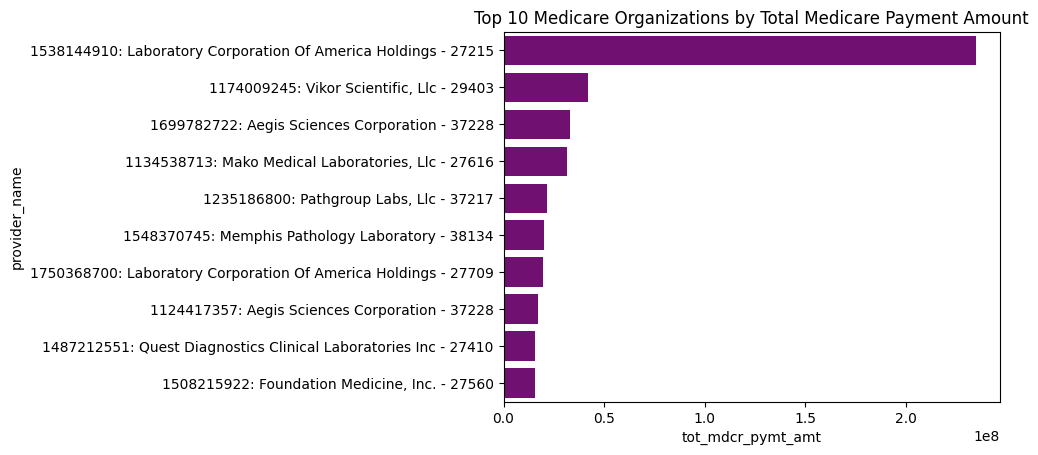

In [19]:
sns.barplot(data=RES02,x='tot_mdcr_pymt_amt',y='provider_name', color='purple')
plt.title('Top 10 Medicare Organizations by Total Medicare Payment Amount')
plt.show()

## Let's look at the counts of each provider type



In [20]:
exl = phys.groupby('rndrng_prvdr_type')[['rndrng_prvdr_state_abrvtn']].count()
exl = exl.reset_index()
exl.columns = ["provider type","count"]
RES03 = exl.nlargest(50000,"count")
RES03

,provider type,count
59,Nurse Practitioner,13816
76,Physician Assistant,7999
26,Family Practice,5763
14,Certified Registered Nurse Anesthetist (CRNA),5720
42,Internal Medicine,5524
...,...,...
86,Radiation Therapy Center,2
41,Intensive Cardiac Rehabilitation,1
47,Mammography Center,1
50,Medical Genetics and Genomics,1


## Let's look at the top 10 Providers in NC by Total Medicare Payment Amount

In [74]:
nc = org_summary[org_summary['rndrng_prvdr_state_abrvtn'] == 'NC']
nctop10 = nc.sort_values(by='tot_mdcr_pymt_amt', ascending=False).head(10)
nctop10

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
1774,1538144910,Laboratory Corporation Of America Holdings,NaN,NaN,NaN,NaN,O,1447 York Ct,NaN,Burlington,...,262.6,37001,Alamance,"{""37001"": ""96.32"", ""37081"": ""3.68""}","Alamance,Guilford","37001,37081",False,False,America/New_York,"36.03178, -79.48892"
1818,1134538713,"Mako Medical Laboratories, Llc",NaN,NaN,NaN,NaN,O,8461 Garvey Dr,NaN,Raleigh,...,957.6,37183,Wake,"{""37183"": ""100""}",Wake,37183,False,False,America/New_York,"35.86728, -78.53812"
1066,1750368700,Laboratory Corporation Of America Holdings,NaN,NaN,NaN,NaN,O,1912 Tw Alexander Dr,NaN,Research Triangle Park,...,1138.3,37063,Durham,"{""37063"": ""100""}",Durham,37063,False,False,America/New_York,"35.92576, -78.83553"
380,1487212551,Quest Diagnostics Clinical Laboratories Inc,NaN,NaN,NaN,NaN,O,4380 Federal Dr Ste 100,NaN,Greensboro,...,657.8,37081,Guilford,"{""37081"": ""100""}",Guilford,37081,False,False,America/New_York,"36.11785, -79.89434"
94,1508215922,"Foundation Medicine, Inc.",NaN,NaN,NaN,NaN,O,7010 Kit Creek Rd,NaN,Morrisville,...,472.7,37183,Wake,"{""37183"": ""88.14"", ""37063"": ""11.86""}","Wake,Durham","37183,37063",False,False,America/New_York,"35.85922, -78.8271"
2352,1164634952,University Of North Carolina At Chapel Hill,NaN,NaN,NaN,NaN,O,6340 Quadrangle Dr Ste 170,NaN,Chapel Hill,...,213.0,37135,Orange,"{""37135"": ""40.53"", ""37037"": ""35.31"", ""37063"": ...","Orange,Chatham,Durham","37135,37037,37063",False,False,America/New_York,"35.85024, -79.02484"
1064,1215914288,Laboratory Corporation Of America Holdings,NaN,NaN,NaN,NaN,O,1904 Alexander Drive,NaN,Research Triangle Park,...,1138.3,37063,Durham,"{""37063"": ""100""}",Durham,37063,False,False,America/New_York,"35.92576, -78.83553"
3761,1336226034,Mecklenburg Emergency Medical Services Agency,NaN,NaN,NaN,NaN,O,4425 Wilkinson Blvd,NaN,Charlotte,...,706.7,37119,Mecklenburg,"{""37119"": ""100""}",Mecklenburg,37119,False,False,America/New_York,"35.23057, -80.90992"
4256,1922098029,County Of Wake,NaN,NaN,NaN,NaN,O,331 S Mcdowell St,NaN,Raleigh,...,2264.6,37183,Wake,"{""37183"": ""100""}",Wake,37183,False,False,America/New_York,"35.77367, -78.63442"
2681,1447592308,Radeas Llc,NaN,NaN,NaN,NaN,O,907 Gateway Commons Cir Ste 100,NaN,Wake Forest,...,252.7,37183,Wake,"{""37183"": ""93.05"", ""37077"": ""3.62"", ""37069"": ""...","Wake,Granville,Franklin","37183,37077,37069",False,False,America/New_York,"35.98129, -78.55288"


In [75]:
exl = nctop10.groupby('rndrng_prvdr_last_org_name')[['tot_mdcr_pymt_amt']].sum()
exl = exl.reset_index()
exl.columns = ["rndrng_prvdr_last_org_name","sum"]
RES14 = exl.nlargest(10,"sum")
RES14

,rndrng_prvdr_last_org_name,sum
2,Laboratory Corporation Of America Holdings,2.629000e+08
3,"Mako Medical Laboratories, Llc",3.128753e+07
5,Quest Diagnostics Clinical Laboratories Inc,1.586682e+07
1,"Foundation Medicine, Inc.",1.564063e+07
7,University Of North Carolina At Chapel Hill,9.483162e+06
4,Mecklenburg Emergency Medical Services Agency,7.781273e+06
0,County Of Wake,6.756241e+06
6,Radeas Llc,5.532086e+06


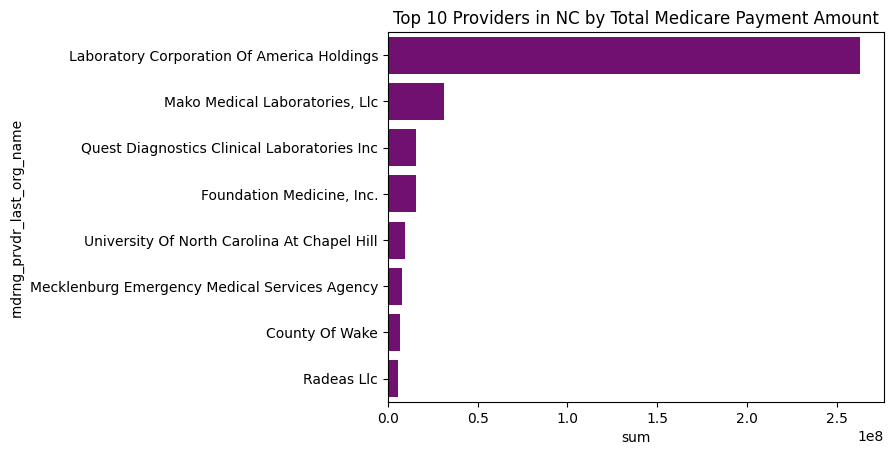

In [76]:
sns.barplot(data=RES14,x='sum',y='rndrng_prvdr_last_org_name', color='purple')
plt.title('Top 10 Providers in NC by Total Medicare Payment Amount')
plt.show()

## Let's graph the number of nurse practitioners by state

In [30]:
q3 = phys.loc[(phys['rndrng_prvdr_type'] == 'Nurse Practitioner'), :]

In [31]:
exl = q3.groupby('rndrng_prvdr_state_abrvtn')[['rndrng_prvdr_type']].count()
exl = exl.reset_index()
exl.columns = ["rndrng_prvdr_state_abrvtn","count"]
RES035 = exl.nlargest(10000,"count")
RES035

,rndrng_prvdr_state_abrvtn,count
2,TN,5833
0,NC,5280
1,SC,2703


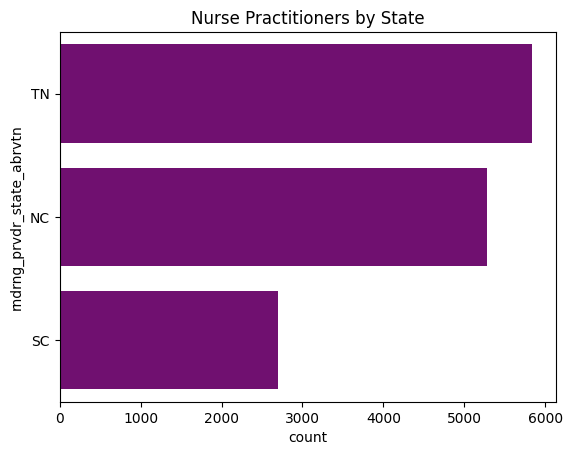

In [32]:
sns.barplot(data=RES035,x='count',y='rndrng_prvdr_state_abrvtn', color='purple')
plt.title('Nurse Practitioners by State')
plt.show()

## Let's look at total organizational spend by state


In [33]:
q4 = phys.loc[(phys['rndrng_prvdr_ent_cd'] == 'O'), :]

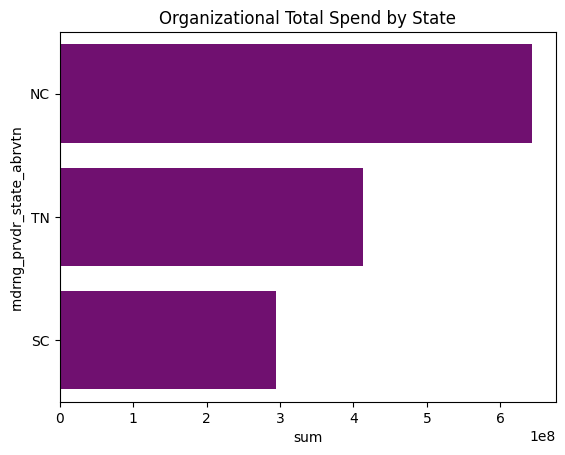

In [35]:
sns.barplot(data=RES04,x='sum',y='rndrng_prvdr_state_abrvtn', color='purple')
plt.title('Organizational Total Spend by State')
plt.show()

## Top 5 Organizational Spending by Specialty



In [36]:
exl = q4.groupby('rndrng_prvdr_type')[['tot_mdcr_pymt_amt']].sum()
exl = exl.reset_index()
exl.columns = ["rndrng_prvdr_type","sum"]
RES05 = exl.nlargest(5,"sum")
RES05

,rndrng_prvdr_type,sum
5,Clinical Laboratory,5.605931e+08
1,Ambulance Service Provider,3.847562e+08
2,Ambulatory Surgical Center,2.673941e+08
9,Mass Immunizer Roster Biller,3.726473e+07
6,Independent Diagnostic Testing Facility (IDTF),2.831906e+07


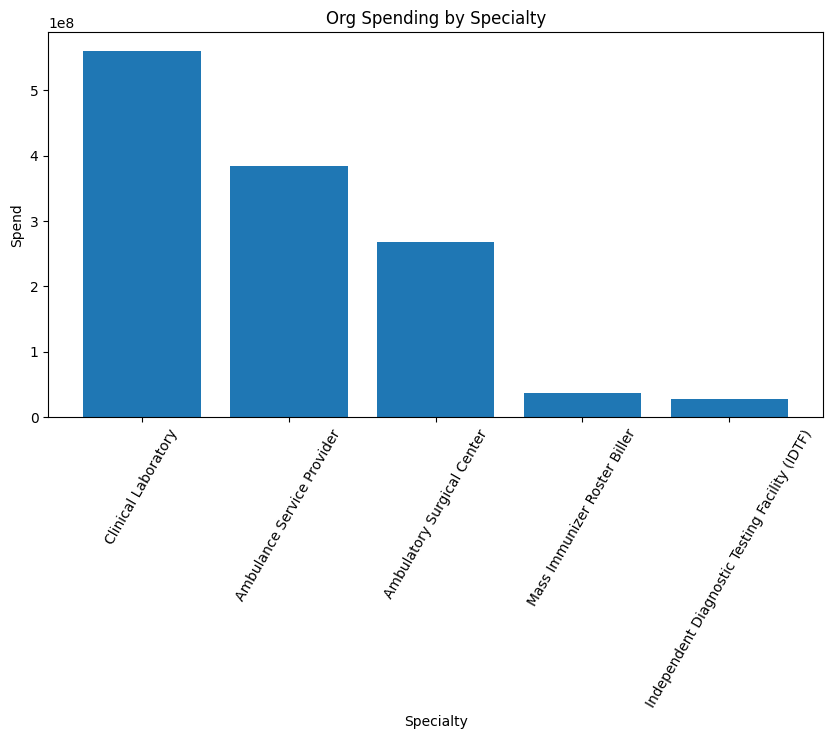

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(RES05['rndrng_prvdr_type'], RES05['sum'])
plt.title('Org Spending by Specialty')
plt.ylabel('Spend')
plt.xlabel('Specialty')
plt.xticks(rotation=60)
plt.show()

## Spending by Provider Type

---



In [39]:
exl = provider_summary.groupby('rndrng_prvdr_type')[['tot_mdcr_pymt_amt']].sum()
exl = exl.reset_index()
exl.columns = ["rndrng_prvdr_type","sum"]
RES06 = exl.nlargest(5,"sum")
RES06

,rndrng_prvdr_type,sum
53,Ophthalmology,5.050825e+08
35,Internal Medicine,4.851399e+08
30,Hematology-Oncology,4.503906e+08
50,Nurse Practitioner,4.433272e+08
21,Family Practice,3.812270e+08


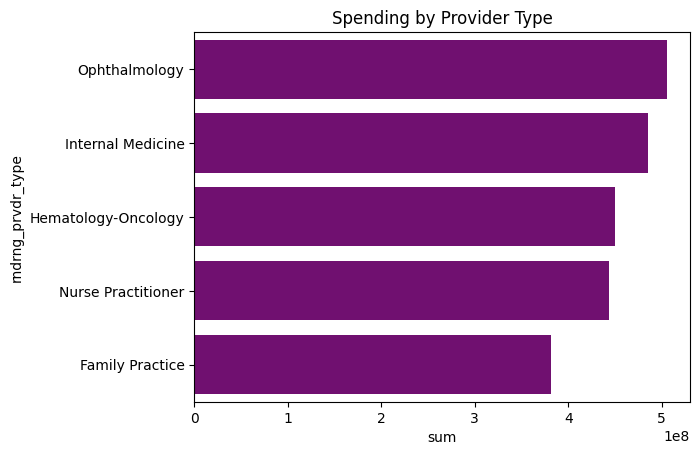

In [41]:
sns.barplot(data=RES06,x='sum',y='rndrng_prvdr_type', color='purple')
plt.title('Spending by Provider Type')
plt.show()

## Top 10 generic opiates by Total Days of Supply



In [42]:
q7 = scripts.loc[(scripts['is_opiate'] == 'Yes'), :]

In [43]:
exl = q7.groupby('gnrc_name')[['tot_day_suply']].sum()
exl = exl.reset_index()
exl.columns = ["gnrc_name","sum"]
RES07 = exl.nlargest(10,"sum")
RES07

,gnrc_name,sum
10,Hydrocodone/Acetaminophen,43131678
20,Oxycodone Hcl/Acetaminophen,25397036
24,Tramadol Hcl,24085196
19,Oxycodone Hcl,19525172
16,Morphine Sulfate,7015124
7,Fentanyl,2607143
15,Methadone Hcl,1330175
0,Acetaminophen With Codeine,1208236
12,Hydromorphone Hcl,1091654
2,Buprenorphine Hcl,1078222


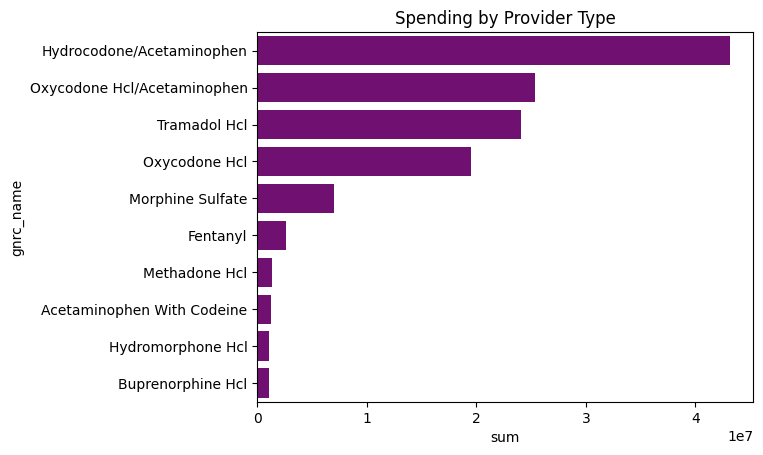

In [44]:
sns.barplot(data=RES07,x='sum',y='gnrc_name', color='purple')
plt.title('Spending by Provider Type')
plt.show()

## Top 10 most expensive drugs



In [45]:
exl = scripts.groupby('brnd_name')[['tot_drug_cst']].mean()
exl = exl.reset_index()
exl.columns = ["brnd_name","mean"]
RES08 = exl.nlargest(10,"mean")
RES08

,brnd_name,mean
1841,Strensiq,2.330864e+06
1302,Myalept,1.980563e+06
1182,Lumizyme,1.578038e+06
2018,Trikafta,1.567392e+06
1690,Ravicti,1.454539e+06
766,Firazyr,1.215047e+06
224,Berinert,1.183852e+06
1813,Soliris,1.059416e+06
61,Aldurazyme,8.895782e+05
361,Chenodal,8.560095e+05


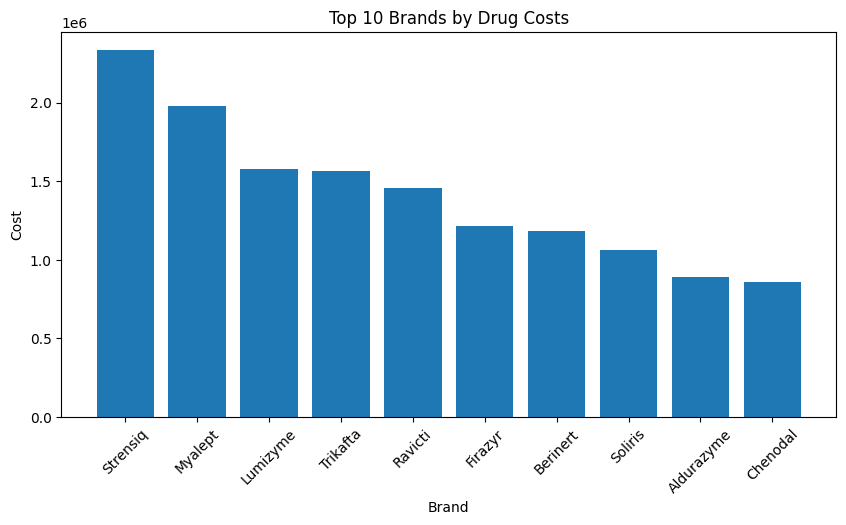

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(RES08['brnd_name'], RES08['mean'])
plt.title('Top 10 Brands by Drug Costs')
plt.ylabel('Cost')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

## Let's look at the top 2 cities in NC, SC and TN by the sum of Total Days of Supply for Hydrocodone and Oxycodone


In [47]:
opiates = scripts[scripts['gnrc_name'].isin(['Hydrocodone/Acetaminophen', 'Oxycodone Hcl/Acetaminophen'])]

In [48]:
merged = pd.merge(opiates, provider_summary, left_on='prscrbr_npi', right_on='rndrng_npi',how='inner')

In [51]:
filtered = merged[merged['official_usps_state_code'].isin(['NC', 'SC', 'TN'])]

In [52]:
grouped = filtered .groupby(['official_usps_state_code','official_usps_city_name']).agg({
    'tot_day_suply': ['sum', 'mean'],
    'tot_drug_cst': ['sum', 'mean']
}).reset_index()

In [53]:
sorted = grouped.sort_values(by=('tot_day_suply', 'sum'), ascending=False)

In [54]:
two_cities = sorted.groupby('official_usps_state_code').head(2)

In [55]:
two_cities['state_city'] = two_cities['official_usps_state_code'] + ' - ' + two_cities['official_usps_city_name']

In [56]:
two_cities

official_usps_state_code official_usps_city_name tot_day_suply  \
                                                               sum   
596                       TN               Knoxville       1924268   
51                        NC               Charlotte       1779301   
516                       TN             Chattanooga       1690470   
465                       SC             Spartanburg       1418811   
246                       NC                 Raleigh        972031   
379                       SC                Florence        870433   

                 tot_drug_cst                     state_city  
            mean          sum         mean                    
596  1937.832830   2268781.57  2284.774995    TN - Knoxville  
51   1581.600889   2149922.08  1911.041849    NC - Charlotte  
516  2493.318584   1910374.18  2817.661032  TN - Chattanooga  
465  4247.937126   1498101.82  4485.334790  SC - Spartanburg  
246  1490.845092   1660371.08  2546.581411      NC - Raleigh  
379  2772.079618   1371700.68  4368.473503     SC - Florence

In [57]:
my_palette = {"TN - Knoxville": "purple",
              "TN - Chattanooga": "purple",
              "SC - Spartanburg": "red",
              "SC - Florence":"red",
              "NC - Charlotte" : "lightgreen",
              "NC - Raleigh" : "lightgreen"
              }

Text(0.5, 1.0, 'Total Day of Supply by City and State')

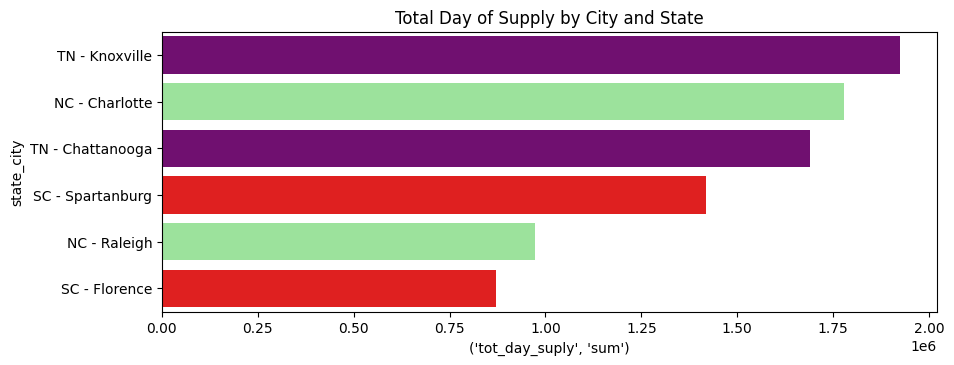

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.barplot(data=two_cities, y="state_city", x=('tot_day_suply', 'sum'), palette=my_palette)
plt.title("Total Day of Supply by City and State")

Text(0.5, 1.0, 'Average Day of Supply by City and State')

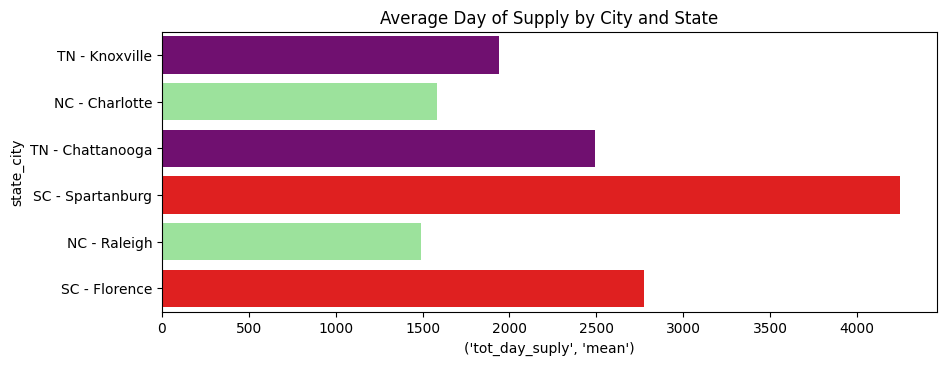

In [59]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
sns.barplot(data=two_cities, y="state_city", x=('tot_day_suply', 'mean'), palette=my_palette)
plt.title("Average Day of Supply by City and State")

## Let's look at Days of Supply per person by city and state

In [60]:
population = zips[zips['official_usps_state_code'].isin(['NC', 'SC', 'TN'])].groupby(['official_usps_state_code', 'official_usps_city_name'])['population'].sum()

In [61]:
two_cities.columns = ['_'.join(map(str, col)).strip('_') for col in two_cities.columns]

In [62]:
two_cities

,official_usps_state_code,official_usps_city_name,tot_day_suply_sum,tot_day_suply_mean,tot_drug_cst_sum,tot_drug_cst_mean,state_city
596,TN,Knoxville,1924268,1937.832830,2268781.57,2284.774995,TN - Knoxville
51,NC,Charlotte,1779301,1581.600889,2149922.08,1911.041849,NC - Charlotte
516,TN,Chattanooga,1690470,2493.318584,1910374.18,2817.661032,TN - Chattanooga
465,SC,Spartanburg,1418811,4247.937126,1498101.82,4485.334790,SC - Spartanburg
246,NC,Raleigh,972031,1490.845092,1660371.08,2546.581411,NC - Raleigh
379,SC,Florence,870433,2772.079618,1371700.68,4368.473503,SC - Florence


In [63]:
merged_10 = pd.merge(two_cities, population, left_on=['official_usps_state_code', 'official_usps_city_name'], right_on=['official_usps_state_code', 'official_usps_city_name'])

In [64]:
merged_10['day_suply_per_person'] = merged_10['tot_day_suply_sum'] / merged_10['population']

In [65]:
merged_10

,official_usps_state_code,official_usps_city_name,tot_day_suply_sum,tot_day_suply_mean,tot_drug_cst_sum,tot_drug_cst_mean,state_city,population,day_suply_per_person
0,TN,Knoxville,1924268,1937.832830,2268781.57,2284.774995,TN - Knoxville,391360.0,4.916874
1,NC,Charlotte,1779301,1581.600889,2149922.08,1911.041849,NC - Charlotte,923655.0,1.926370
2,TN,Chattanooga,1690470,2493.318584,1910374.18,2817.661032,TN - Chattanooga,210667.0,8.024370
3,SC,Spartanburg,1418811,4247.937126,1498101.82,4485.334790,SC - Spartanburg,112001.0,12.667842
4,NC,Raleigh,972031,1490.845092,1660371.08,2546.581411,NC - Raleigh,555041.0,1.751278
5,SC,Florence,870433,2772.079618,1371700.68,4368.473503,SC - Florence,91570.0,9.505657


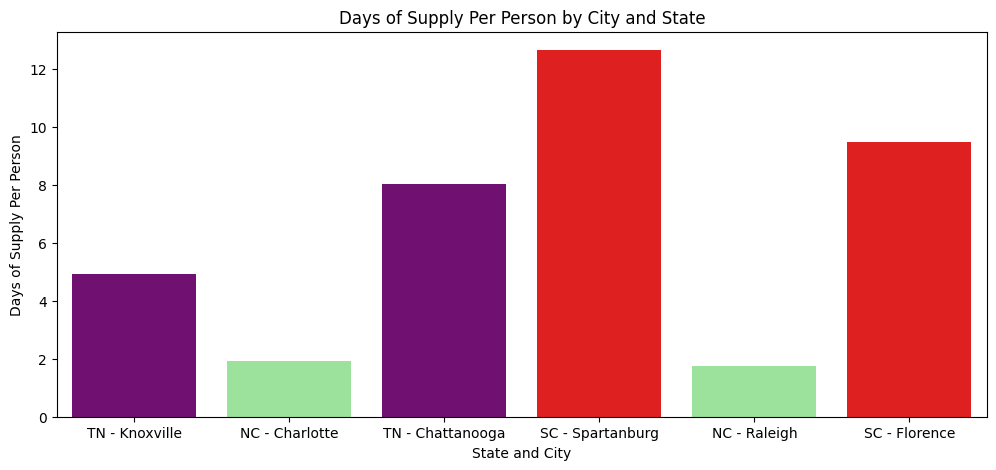

In [66]:
plt.figure(figsize=(12,5))
sns.barplot(data=merged_10, x="state_city", y=('day_suply_per_person'), palette=my_palette)
plt.title("Days of Supply Per Person by City and State")
plt.ylabel("Days of Supply Per Person")
plt.xlabel("State and City")
plt.show()

## Let's look at the top 10 drugs by 30 Day Prescriptions


In [67]:
exl = scripts.groupby('gnrc_name')[['tot_30day_fills']].sum()
exl = exl.reset_index()
exl.columns = ["gnrc_name","sum"]
RES11 = exl.nlargest(10,"sum")
RES11

,gnrc_name,sum
104,Atorvastatin Calcium,9046098.3
65,Amlodipine Besylate,7661877.2
753,Levothyroxine Sodium,7194329.8
767,Lisinopril,5975858.1
812,Metformin Hcl,5212996.0
948,Omeprazole,5201357.1
778,Losartan Potassium,4596239.7
573,Gabapentin,4042974.2
836,Metoprolol Succinate,3696631.1
572,Furosemide,3675716.8


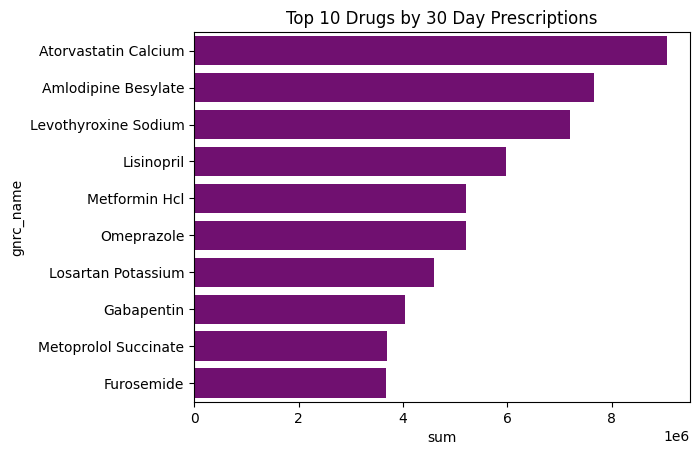

In [68]:
sns.barplot(data=RES11,x='sum',y='gnrc_name', color='purple')
plt.title('Top 10 Drugs by 30 Day Prescriptions')
plt.show()

## Now the top 10 opiates by 30 Day Prescriptions


In [69]:
q12 = scripts.loc[(scripts['is_opiate'] == 'Yes'), :]

In [70]:
exl = q12.groupby('gnrc_name')[['tot_30day_fills']].sum()
exl = exl.reset_index()
exl.columns = ["gnrc_name","sum"]
RES12 = exl.nlargest(10,"sum")
RES12

,gnrc_name,sum
10,Hydrocodone/Acetaminophen,1973498.1
24,Tramadol Hcl,1129943.7
20,Oxycodone Hcl/Acetaminophen,1032051.5
19,Oxycodone Hcl,804515.6
16,Morphine Sulfate,247953.7
7,Fentanyl,92064.3
0,Acetaminophen With Codeine,73011.1
15,Methadone Hcl,46871.2
12,Hydromorphone Hcl,45948.5
2,Buprenorphine Hcl,43629.2


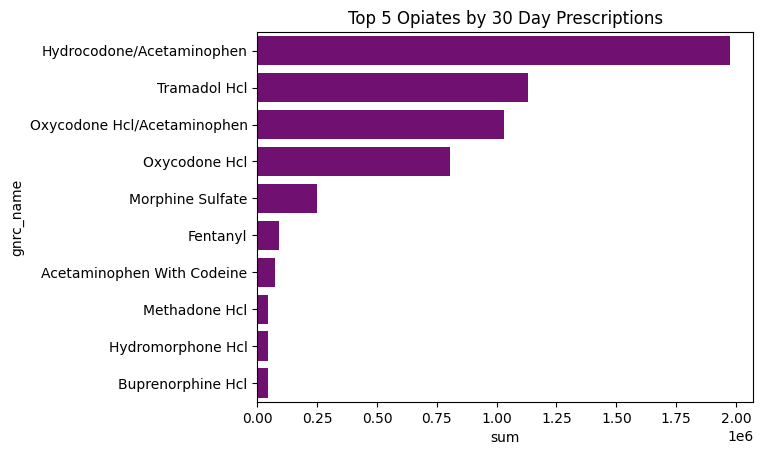

In [71]:
sns.barplot(data=RES12,x='sum',y='gnrc_name', color='purple')
plt.title('Top 5 Opiates by 30 Day Prescriptions')
plt.show()

## And finally... the top 5 most expensive opiates

In [72]:
exl = q12.groupby('gnrc_name')[['tot_drug_cst']].sum()
exl = exl.reset_index()
exl.columns = ["gnrc_name","sum"]
RES13 = exl.nlargest(5,"sum")
RES13

,gnrc_name,sum
19,Oxycodone Hcl,62451937.93
20,Oxycodone Hcl/Acetaminophen,43771487.43
10,Hydrocodone/Acetaminophen,40029294.05
23,Tapentadol Hcl,15301357.61
2,Buprenorphine Hcl,13610329.28


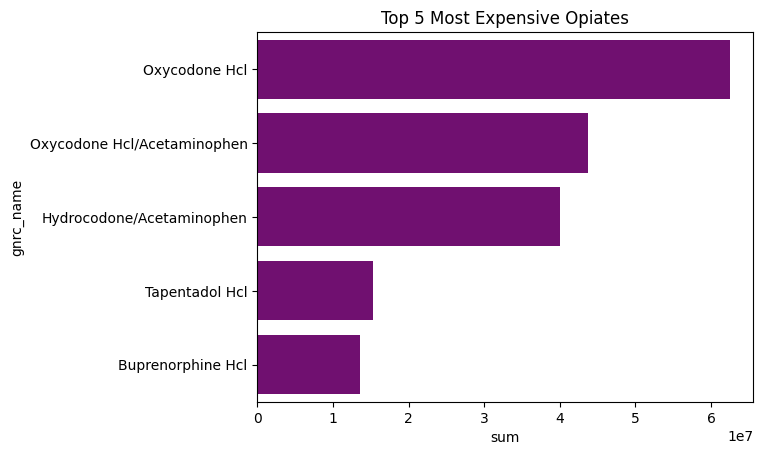

In [73]:
sns.barplot(data=RES13,x='sum',y='gnrc_name', color='purple')
plt.title('Top 5 Most Expensive Opiates')
plt.show()